In [1]:
#Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

In [2]:
data_df = pd.read_csv("insurance_part2_data.csv")

In [3]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


### Q 2.1: Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:
data_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [7]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000,NaN,NaN,NaN,38.091,10.4635,8,32,36,42,84
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000,NaN,NaN,NaN,14.5292,25.4815,0,0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000,NaN,NaN,NaN,70.0013,134.053,-1,11,26.5,63,4580
Sales,3000,NaN,NaN,NaN,60.2499,70.734,0,20,33,69,539
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_df.head(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
5,45,JZI,Airlines,Yes,15.75,Online,8,45.00,Bronze Plan,ASIA
6,61,CWT,Travel Agency,No,35.64,Online,30,59.40,Customised Plan,Americas
7,36,EPX,Travel Agency,No,0.00,Online,16,80.00,Cancellation Plan,ASIA
8,36,EPX,Travel Agency,No,0.00,Online,19,14.00,Cancellation Plan,ASIA
9,36,EPX,Travel Agency,No,0.00,Online,42,43.00,Cancellation Plan,ASIA


In [9]:
data_df.tail(10)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2990,51,EPX,Travel Agency,No,0.00,Online,2,20.00,Customised Plan,ASIA
2991,29,C2B,Airlines,Yes,48.30,Online,381,193.20,Silver Plan,ASIA
2992,28,CWT,Travel Agency,No,11.88,Online,389,19.80,Customised Plan,ASIA
2993,36,EPX,Travel Agency,No,0.00,Online,234,10.00,Cancellation Plan,ASIA
2994,27,C2B,Airlines,Yes,71.85,Online,416,287.40,Gold Plan,ASIA
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [10]:
data_df.shape

(3000, 10)

**Unique counts of all Nominal Variables**

In [11]:
for column in data_df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',data_df[column].nunique())
    print(data_df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1136
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2465
Name: Destination, dtype: int64




**Checking the duplicate data**

In [12]:
dups = data_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
data_df[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


**Finding Outlier:**

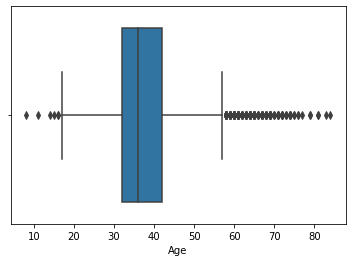

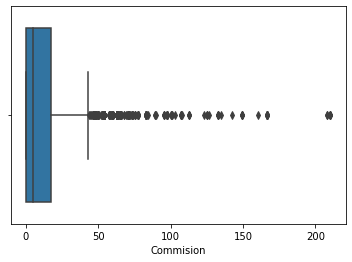

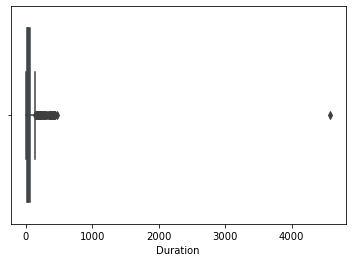

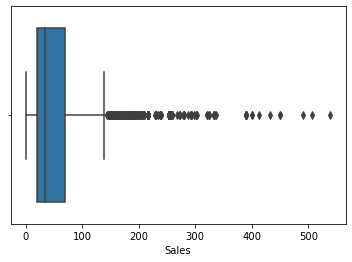

In [13]:
sns.boxplot(x='Age', data=data_df)
plt.show()
sns.boxplot(x='Commision', data=data_df)
plt.show()
sns.boxplot(x='Duration', data=data_df)
plt.show()
sns.boxplot(x='Sales', data=data_df)
plt.show()

**Outlier Treatment**

In [68]:
#capping technique
def remove_out(xyz):
    sorted(xyz)
    Q1,Q3 = xyz.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [69]:
lrage,urage = remove_out(data_df['Age'])
data_df['Age'] = np.where(data_df['Age'] > urage,urage,data_df['Age'])
data_df['Age'] = np.where(data_df['Age'] < lrage,lrage,data_df['Age'])

In [70]:
lrcommision,urcommision = remove_out(data_df['Commision'])
data_df['Commision'] = np.where(data_df['Commision'] > urcommision,urcommision,data_df['Commision'])
data_df['Commision'] = np.where(data_df['Commision'] < lrcommision,lrcommision,data_df['Commision'])

In [71]:
lrduration,urduration = remove_out(data_df['Duration'])
data_df['Duration'] = np.where(data_df['Duration'] > urduration,urduration,data_df['Duration'])
data_df['Duration'] = np.where(data_df['Duration'] < lrduration,lrduration,data_df['Duration'])

In [72]:
lrsales,ursales = remove_out(data_df['Sales'])
data_df['Sales'] = np.where(data_df['Sales'] > ursales,ursales,data_df['Sales'])
data_df['Sales'] = np.where(data_df['Sales'] < lrsales,lrsales,data_df['Sales'])

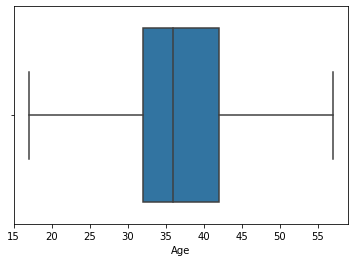

In [73]:
sns.boxplot(x='Age', data=data_df)
plt.show()

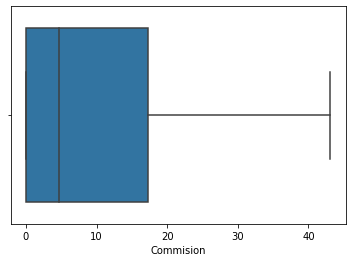

In [74]:
sns.boxplot(x='Commision', data=data_df)
plt.show()

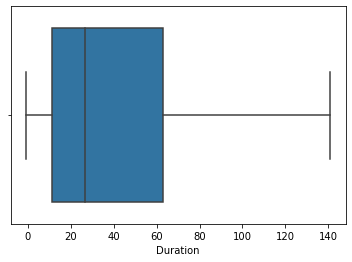

In [75]:
sns.boxplot(x='Duration', data=data_df)
plt.show()

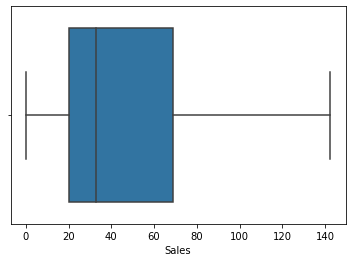

In [76]:
sns.boxplot(x='Sales', data=data_df)
plt.show()

C:\Users\91951\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


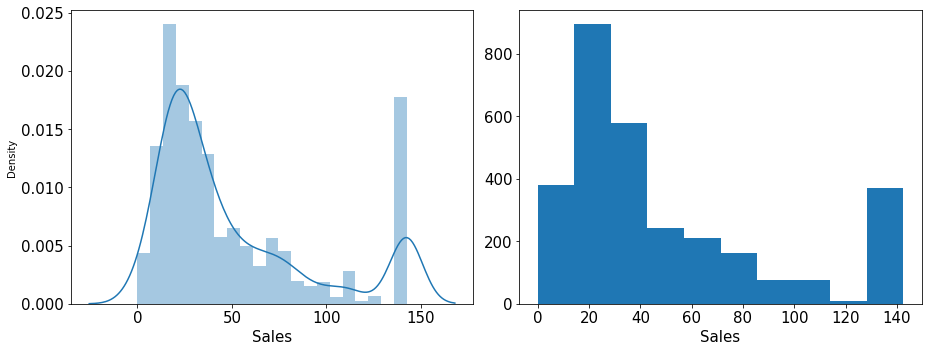

In [23]:
fig, (ax2,ax3)=plt.subplots(1,2,figsize=(13,5))
#distplot
sns.distplot(data_df['Sales'],ax=ax2)
ax2.set_xlabel('Sales', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(data_df['Sales'])
ax3.set_xlabel('Sales', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


<function matplotlib.pyplot.show(close=None, block=None)>

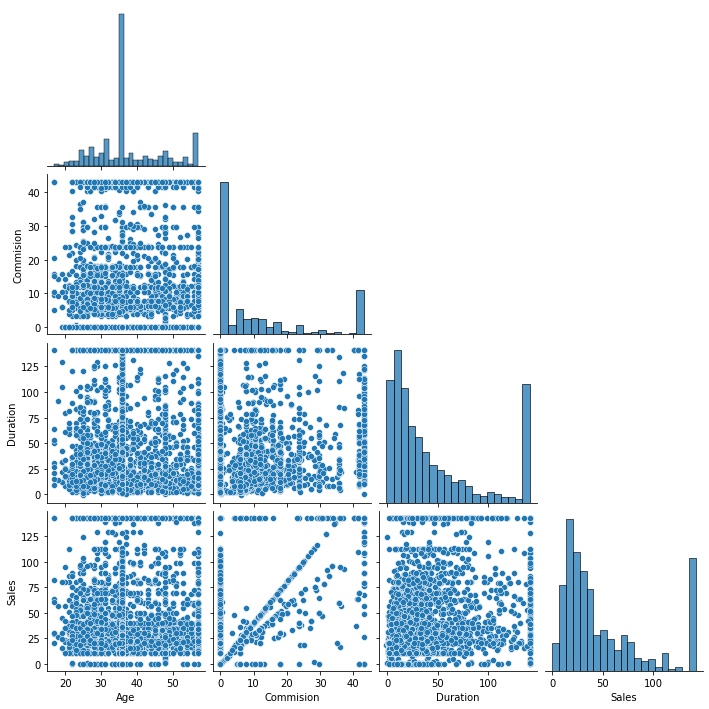

In [24]:
sns.pairplot(data_df,corner=True)
plt.show

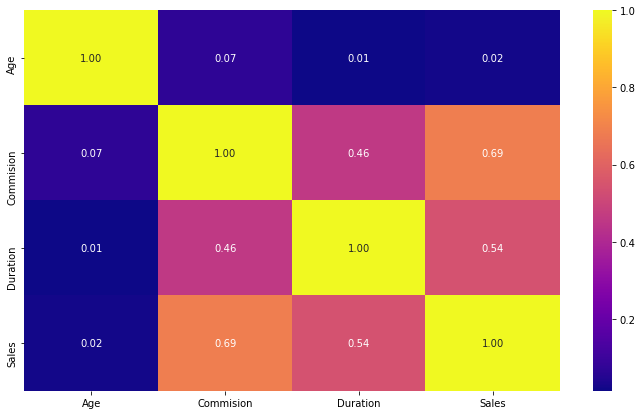

In [25]:
plt.figure(figsize=(12,7))
sns.heatmap(data_df.corr(),annot=True,fmt = '.2f',cmap='plasma')
plt.show()

**Convert all objects to categorical:**

In [26]:
for feature in data_df.columns: 
    if data_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(data_df[feature].unique()))
        print(pd.Categorical(data_df[feature].unique()).codes)
        data_df[feature] = pd.Categorical(data_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [27]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   float64
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   float64
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [28]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


**Proportion of 1 and 0**

In [29]:
data_df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

### Q 2.2: Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

**Splitting data into training and test set for independent attributes**

In [30]:
X = data_df.drop("Claimed", axis=1)
y = data_df.pop("Claimed")

In [31]:
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()
X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

**Decision Tree Classifier**

In [32]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [33]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [34]:
import os
os.chdir("C:\\Users\\91951\\Desktop\\Greatlearning\\Unit 4 - Data Mining\\Project - Data Mining")

In [35]:
train_char_label = ['No', 'Yes']

Insurance_Tree_File = open("C:\\Users\\91951\\Desktop\\Greatlearning\\Unit 4 - Data Mining\\Project - Data Mining\\insurance_tree.dot",'w')
dot_data = tree.export_graphviz(dt_model, out_file=Insurance_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Insurance_Tree_File.close()

The tree can be viewed here: http://webgraphviz.com/

In [36]:
from sklearn.model_selection import GridSearchCV

In [78]:
param_grid = {
    'max_depth': [7, 8, 9, 10],
    'min_samples_leaf': [15, 20, 25],
    'min_samples_split': [45, 60, 75]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [38]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [15, 20, 25],
                         'min_samples_split': [45, 60, 75]})

In [39]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 45}

In [40]:
best_grid = grid_search.best_estimator_

ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1453
           1       0.71      0.60      0.65       647

    accuracy                           0.80      2100
   macro avg       0.77      0.75      0.76      2100
weighted avg       0.79      0.80      0.80      2100



AUC: 0.812


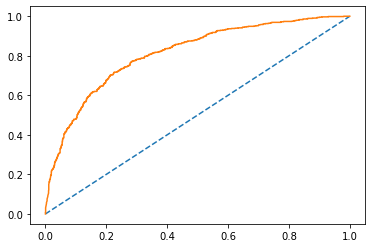

In [80]:
# AUC and ROC for the training data

# Predict probabilities
probs_cart = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.806


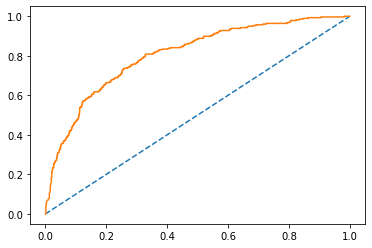

In [81]:
# AUC and ROC for the test data

# Predict probabilities
probs_cart = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

**CART Confusion Matrix and Classification Report for the training data**

In [83]:
confusion_matrix(train_labels, ytrain_predict)

array([[1296,  157],
       [ 318,  329]], dtype=int64)

In [84]:
#Train Data Accuracy
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7738095238095238

In [85]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85      1453
           1       0.68      0.51      0.58       647

    accuracy                           0.77      2100
   macro avg       0.74      0.70      0.71      2100
weighted avg       0.76      0.77      0.76      2100



**CART Confusion Matrix and Classification Report for the testing data**

In [86]:
confusion_matrix(test_labels, ytest_predict)

array([[555,  68],
       [139, 138]], dtype=int64)

In [87]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels) 
cart_test_acc

0.77

In [88]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



**Variable Importance**

In [41]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.532910
Sales         0.197586
Product Name  0.101859
Duration      0.065688
Commision     0.054759
Age           0.044345
Type          0.002852
Channel       0.000000
Destination   0.000000


**Random Forest Classifier**

In [89]:
param_grid_rf = {
    'max_depth': [4,5,6],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [8,9,11,15],
    'min_samples_split': [46,50,55],
    'n_estimators': [250,290,350]
}

rfcl = RandomForestClassifier()

grid_search_rf = GridSearchCV(estimator = rfcl, param_grid = param_grid_rf, cv = 5)

In [92]:
grid_search_rf.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 5, 6], 'max_features': [2, 3, 4, 5],
                         'min_samples_leaf': [8, 9, 11, 15],
                         'min_samples_split': [46, 50, 55],
                         'n_estimators': [250, 290, 350]})

In [93]:
grid_search_rf.best_params_

{'max_depth': 6,
 'max_features': 4,
 'min_samples_leaf': 8,
 'min_samples_split': 50,
 'n_estimators': 290}

In [94]:
best_grid_rf = grid_search_rf.best_estimator_

In [95]:
ytrain_predict_rf = best_grid_rf.predict(X_train)
ytest_predict_rf = best_grid_rf.predict(X_test)

In [110]:
print(classification_report(train_labels,ytrain_predict_rf))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1453
           1       0.72      0.62      0.67       647

    accuracy                           0.81      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.80      0.81      0.80      2100



In [109]:
print(classification_report(test_labels,ytest_predict_rf))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       623
           1       0.68      0.56      0.61       277

    accuracy                           0.78       900
   macro avg       0.75      0.72      0.73       900
weighted avg       0.77      0.78      0.78       900



In [106]:
confusion_matrix(train_labels,ytrain_predict_rf)

array([[1298,  155],
       [ 247,  400]], dtype=int64)

In [107]:
rf_train_acc=best_grid_rf.score(X_train,train_labels) 
rf_train_acc

0.8085714285714286

AUC: 0.860


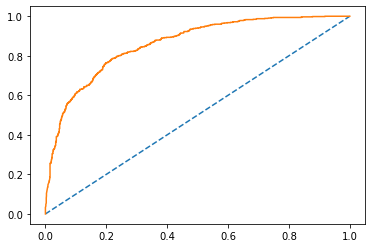

In [135]:
# AUC and ROC for the train data

# Predict probabilities
probs_rf = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
# calculate AUC
rf_train_auc = roc_auc_score(train_labels, probs_rf)
print('AUC: %.3f' % rf_train_auc)
# calculate roc curve
rf_train_fpr, rf_train_tpr, rf_train_thresholds = roc_curve(train_labels, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_train_fpr, rf_train_tpr)

In [117]:
confusion_matrix(test_labels,ytest_predict_rf)

array([[548,  75],
       [121, 156]], dtype=int64)

In [118]:
rf_test_acc=best_grid_rf.score(X_test,test_labels) 
rf_test_acc

0.7822222222222223

AUC: 0.819


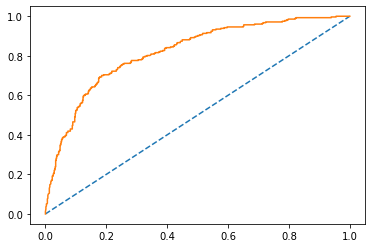

In [136]:
# AUC and ROC for the test data

# Predict probabilities
probs_rf = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
# calculate AUC
rf_test_auc = roc_auc_score(test_labels, probs_rf)
print('AUC: %.3f' % rf_test_auc)
# calculate roc curve
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(test_labels, probs_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rf_test_fpr, rf_test_tpr)

**MLP Classifier (Artificial Neural Network)**

In [98]:
sc = StandardScaler() 
X_trains = sc.fit_transform(X_train) 
X_tests = sc.transform (X_test)

In [99]:
param_grid_ann = {
    'hidden_layer_sizes': [50,100,200],
    'max_iter': [2500,3000,4000],
    'solver': ['adam'],
    'tol': [0.01], 
}

nncl = MLPClassifier()

grid_search_ann = GridSearchCV(estimator = nncl, param_grid = param_grid_ann, cv = 10)

In [100]:
grid_search_ann.fit(X_trains, train_labels)

GridSearchCV(cv=10, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [50, 100, 200],
                         'max_iter': [2500, 3000, 4000], 'solver': ['adam'],
                         'tol': [0.01]})

In [101]:
grid_search_ann.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [102]:
best_grid_ann = grid_search_ann.best_estimator_

In [125]:
ytrain_predict_ann = best_grid_ann.predict(X_trains)
ytest_predict_ann = best_grid_ann.predict(X_tests)

In [126]:
print(classification_report(train_labels,ytrain_predict_ann))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1453
           1       0.68      0.52      0.59       647

    accuracy                           0.78      2100
   macro avg       0.74      0.71      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [127]:
print(classification_report(test_labels,ytest_predict_ann))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       623
           1       0.67      0.50      0.57       277

    accuracy                           0.77       900
   macro avg       0.73      0.69      0.71       900
weighted avg       0.76      0.77      0.76       900



**For train data:**

In [128]:
confusion_matrix(train_labels,ytrain_predict_ann)

array([[1295,  158],
       [ 310,  337]], dtype=int64)

In [129]:
mlp_train_acc=best_grid_ann.score(X_train,train_labels) 
mlp_train_acc

0.7771428571428571

AUC: 0.860


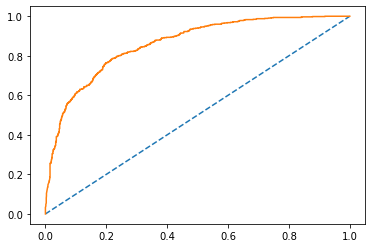

In [137]:
# AUC and ROC for the train data

# Predict probabilities
probs_ann = best_grid_rf.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_ann = probs_ann[:, 1]
# calculate AUC
ann_train_auc = roc_auc_score(train_labels, probs_ann)
print('AUC: %.3f' % ann_train_auc)
# calculate roc curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr)

**For test data:**

In [131]:
confusion_matrix(test_labels,ytest_predict_ann)

array([[553,  70],
       [138, 139]], dtype=int64)

In [132]:
mlp_test_acc=best_grid_ann.score(X_test,test_labels) 
mlp_test_acc

0.7688888888888888

AUC: 0.819


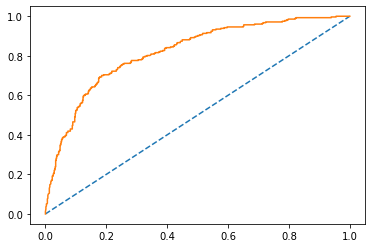

In [138]:
# AUC and ROC for the test data

# Predict probabilities
probs_ann = best_grid_rf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_ann = probs_ann[:, 1]
# calculate AUC
ann_test_auc = roc_auc_score(test_labels, probs_ann)
print('AUC: %.3f' % ann_test_auc)
# calculate roc curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(test_labels, probs_ann)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr)

### 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

**Comparing the performance metrics of CART, RF and ANN models:**

In [151]:
index=['Accuracy']
data = pd.DataFrame({'CART Train':[cart_train_acc],
        'CART Test':[cart_test_acc],
       'Random Forest Train':[rf_train_acc],
        'Random Forest Test':[rf_test_acc],
       'Neural Network Train':[mlp_train_acc],
        'Neural Network Test':[mlp_test_acc]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.77,0.77,0.81,0.78,0.78,0.77


Selected Model: Random Forest

### Q2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

Insights from the model and given data:
- In these cases where we’re facing the direct-consumer data, it is always preferred to have more data in terms of past history and in claim reason specific point of view
- By looking at the booking type, destination and product description we can see that the major claims are done by the travel agencies or offline businesses and data 90% of insurance is done by online channels

Actions items suggested:
- To get the more detailed data from customers end as traeller ‘s age, demographic details, travel purpose, booking and payment gateway details.
- Hyper-localized research on the agencies to reduce the frauds
- Reducing claim lifecycle, claim handling costs
- Business level justification from the online booking agencies
- Analytics empowered algorithms to monitor the pattern of online agencies, this will lead to less fraud, successful business go and customer satisfaction
